# Support Vector Machine

# Importation des packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.datasets import make_moons

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    xy = std.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Lier votre sessions Google Colab avec Google Drive

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1ghsB3WdBlyLRzvfede0KWDqf9P16KyHl?usp=sharing

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Génération des données des régressions

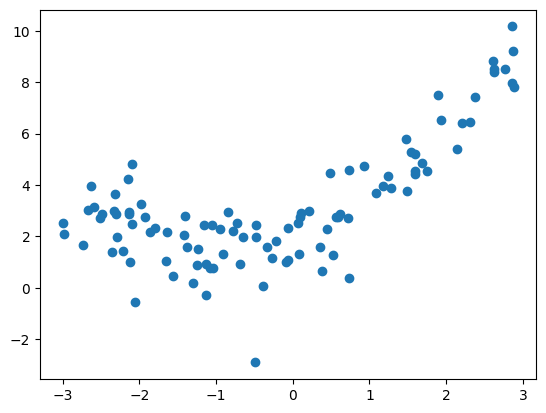

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()

# Préparation des données

Pour l'utilisation d'un modèle linéaire, il est indispensable de passer par une étape de normalisation des données.

Cette étape permet de rendre le modèle interprétable mais aussi de faciliter la convergence du modèle.

N'hésitez pas à utiliser le [doc](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [5]:
std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

## 1 Régression linéaire VS SVR

Vous allez voir la différence entre la régresssion linéaire et le SVM.

initialisation du modèle

Dans le cas de la régression, il n'y a pas de choix d'hyperparamètre.

Il suffit donc d'initialiser la fonction.

N'hésitez pas à utiliser le [doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [6]:
lin_reg = LinearRegression()

Entraînement du modèle avec la méthode `fit`.

In [7]:
lin_reg.fit(X, y)

LinearRegression()

Visualisation de la performance de la régression linéaire sur les données

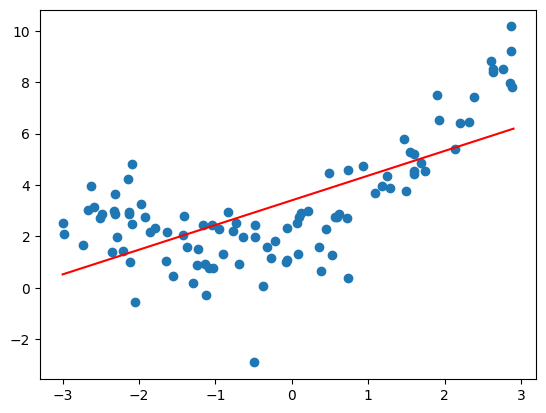

In [8]:
x_lr = np.array(np.arange(-3, 3, 0.1)).reshape(60, 1)
y_lr = lin_reg.predict(x_lr)
plt.plot(x_lr, y_lr, color='red')

plt.scatter(X,y)
plt.show()

You will see the difference between linear regression and SVM regressor

Intialisation du SVM avec la fonction `SVR` de sklearn.

N'hésitez pas à vous aidez de la [doc](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html)

In [9]:
svm = SVR()

Entraîner le modèle de SVM sur les données normalisées.

In [10]:
svm.fit(X_std, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Regardez les performances du modèle sur les données.

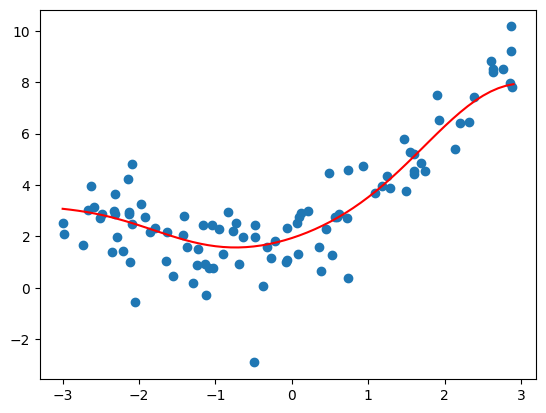

In [11]:
x_lr = np.array(np.arange(-3, 3, 0.1)).reshape(60, 1)
x_lr_std = std.transform(x_lr)
y_lr = svm.predict(x_lr_std)
plt.plot(x_lr, y_lr, color='red')

plt.scatter(X,y)
plt.show()

Comme vous pouvez le constater, le SVM peut mieux s'adapter aux données que la régression linéaire.

## 2 Régression logistique VS SVC

Vous verrez la différence entre un classificateur SVM et un classifieur SVM.

### Génération des données de classification

Génération du jeu de données

In [12]:
X, y = make_moons(n_samples=100, noise=0.1)

Visualisation du jeu de données.

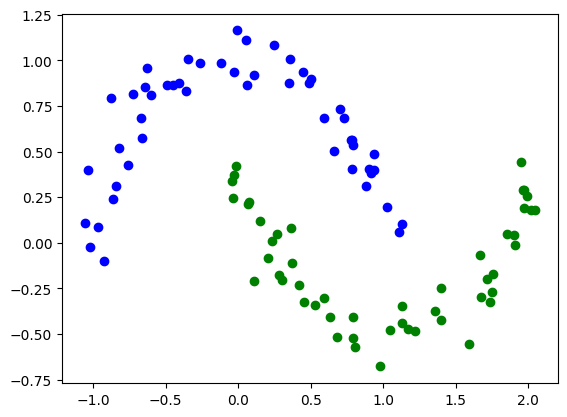

In [13]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='green')
plt.show()

### Prépration des données

Standardisation des données.

In [14]:
std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

### Entraînement des modèles

Utilisez 'lbfgs' comme solver.

N'hésitez pas à utiliser le [doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


In [15]:
log_reg = LogisticRegression(solver='lbfgs')

Entraîner le modèle de régression logistique avec la méthode `fit`.

In [16]:
log_reg.fit(X, y)

LogisticRegression()

Visualisez la performance du modèle sur les données.

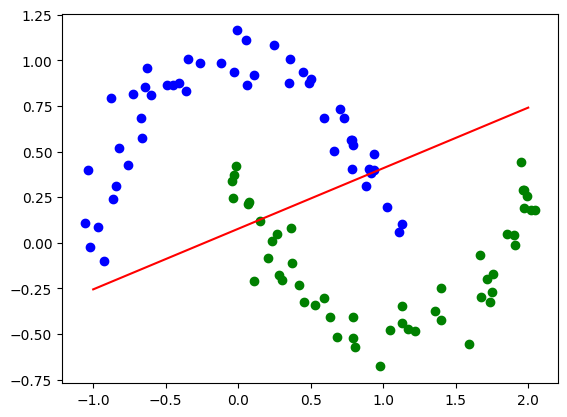

In [17]:
W0 = log_reg.intercept_
W = log_reg.coef_

rl_x = np.array(range(-1, 3))
rl_y = (-1/W[0, 1]) * (rl_x * W[0, 0] + W0[0])

plt.plot(rl_x, rl_y, c='red')

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='green')
plt.show()

Initialisez le modèle de SVM pour la classification grâce à la fonction `SVC` de sklearn.

Utilisez les paramètres kernel='rbf' et gamma='scale'.

N'hésitez pas à vous aider de la [documentation](https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html).

In [18]:
svm = SVC(kernel='rbf', gamma='scale')

Entraîner le modèle sur les données standardisées.

In [19]:
svm.fit(X_std, y)

SVC()

Visualisation des performances du SVM.

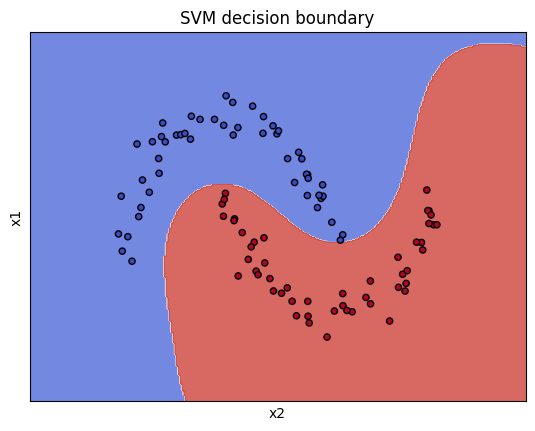

In [20]:
X0, X1 = X_std[:, 0], X_std[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x2')
plt.ylabel('x1')
plt.xticks(())
plt.yticks(())
plt.title('SVM decision boundary')
plt.show()

## 3 L'hyperparamètre C dans la classificaition avec le SVM

Chargez le jeu de données

In [21]:
svm_data_1 = np.genfromtxt('/content/drive/MyDrive/Turnover_prediction/svm_data_1.txt', delimiter=',')

Préparez les données.

In [22]:
# We construct the X dataset
X = svm_data_1[:, :2]

# We construct the Y dataset
y = svm_data_1[:, 2]

Standardisation des données.

In [23]:
std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

Nous commencerons par un ensemble de données d'exemples en 2D qui peuvent être séparés par une frontière linéaire. Dans cet ensemble de données, les positions des exemples positifs (indiqués par un triangle en vert) et des exemples négatifs (indiqués par un cercle en bleu) suggèrent une séparation naturelle indiquée par l'écart. Notez toutefois qu'il existe un exemple positif aberrant (un triangle en vert) à l'extrême gauche, à environ (0,1, 4,1). Dans le cadre de cet exercice, vous verrez également comment cette valeur aberrante affecte la frontière de décision du SVM.

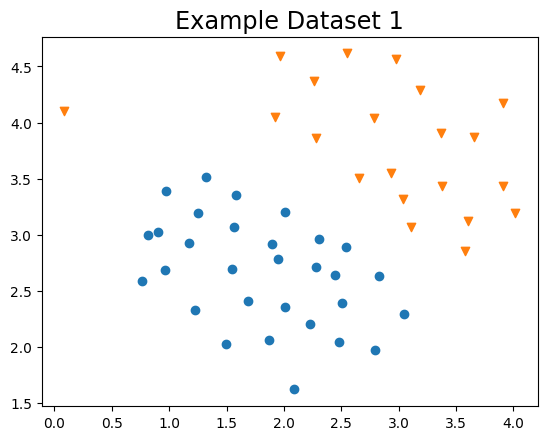

In [24]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='Admitted')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Not admitted', marker='v')
plt.title('Example Dataset 1', size='xx-large')

plt.show()

Dans cette partie de l'exercice, vous allez essayer d'utiliser différentes valeurs du paramètre C avec les SVM. De manière informelle, le paramètre C est une valeur positive qui contrôle la pénalité pour les exemples d'apprentissage mal classés. Un paramètre C élevé indique au SVM qu'il doit essayer de classer correctement tous les exemples. C joue un rôle similaire à $\frac{1}{\lambda}$ , où $\lambda$ est le paramètre de régularisation que nous avons utilisé précédemment pour la régression logistique.


Nouvelle fonction de coût :

$$J(W)=C[\sum^{m}_{i}y^{(i)}cost_1(W^Tx{(i)})+(1-y^{(i)})cost_0(W^Tx^{(i)})]+\frac{1}{2}\sum^m_{i=1}w^2_j$$


$$C=\frac{1}{\lambda}$$

Intialisez la fonction `SVC` et essayez différentes valeur pour le paramètre *C*.

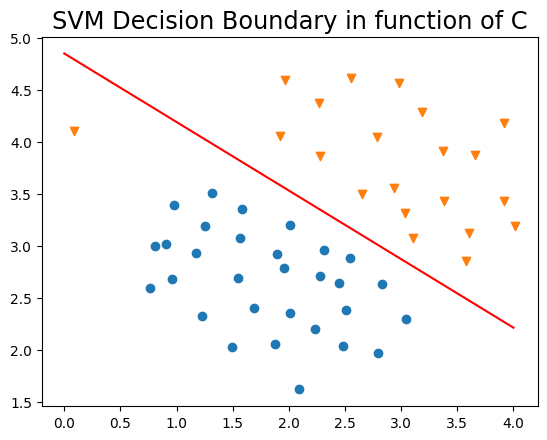

In [25]:
### Your code start here ###
svc = SVC(C=1, kernel='linear', gamma='scale')
### Your code end here ###

svc.fit(X, y)

W0 = svc.intercept_
W = svc.coef_

rl_x = np.array(range(0, 5))
rl_y = (-1/W[0, 1]) * (rl_x * W[0, 0] + W0[0])

plt.plot(rl_x, rl_y, c='red')

plt.scatter(X[y==0, 0], X[y==0, 1], label='Admitted')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Not admitted', marker='v')
plt.title('SVM Decision Boundary in function of C', size='xx-large')

plt.show()

Que pensez-vous de l'impact de C dans cet exemple ?

**Autres exemples**

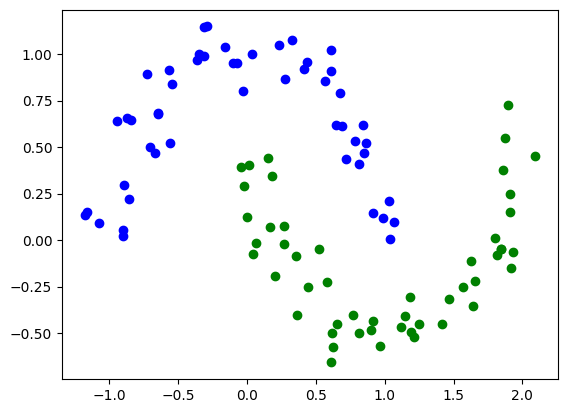

In [26]:
X, y = make_moons(n_samples=100, noise=0.1)

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='green')
plt.show()

Jouez avec la valeur de C et les différents kernels proposés par SKlearn.

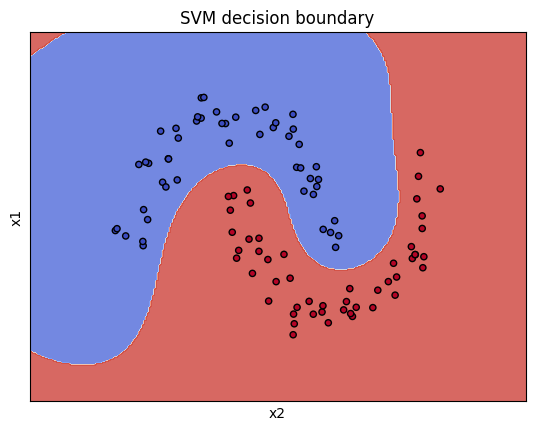

In [27]:
std = StandardScaler()
# search in the sklearn documentation en use 'fit_transform'
X_std = std.fit_transform(X)

svm = SVC(C=100, kernel='rbf', gamma='scale')

svm.fit(X_std, y)


X0, X1 = X_std[:, 0], X_std[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(plt, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x2')
plt.ylabel('x1')
plt.xticks(())
plt.yticks(())
plt.title('SVM decision boundary')
plt.show()